In [1]:
import pandas as pd
import numpy as np

In [2]:
import input_generator as gen

In [3]:
# config
x=15
z=25

input_folder = '../../compute/input/'


In [4]:

Ba_Sheilding_Material = gen.Material("Ba_Sheilding", 3, {
                                                        1001: -0.048535,
                                                        5010: -0.034981,
                                                        5011: -0.139923,
                                                        8016: -0.776561,
                                                        })
Pb_Sheilding_Material = gen.Material("Pb_Sheilding", 4, {
                                                        82000: 1,
                                                        })
Fe_Sheilding_Material = gen.Material("Fe_Sheilding", 5, {
                                                        26000: 1,
                                                        })
Detector_Material = gen.Material("Detector", 7, {
                                                        11023: 0.5,
                                                        53127: 0.5,
                                                    })
Air_Material = gen.Material("Air", 12, {
                                                        8016: -0.23,
                                                        7014: -0.77,
                                                    })
Tire_Material = gen.Material("Tire", 13, {
                                                        1001: -0.118371,
                                                        6000: -0.881629,
                                                    })

static_materials = [Ba_Sheilding_Material, Pb_Sheilding_Material, Fe_Sheilding_Material, Detector_Material, Air_Material, Tire_Material]

In [5]:
def place_shield(shield_ids, x, y, z):
    
    Front_Pb_shield_surface = gen.box(shield_ids[0], [x+37.5, y+0, z+5], 5, 60.1, 20)
    Front_Fe_shield_1_surface = gen.box(shield_ids[1], [x+32.5, y+0, z+5], 5, 55, 20)
    Front_Ba_shield_surface = gen.box(shield_ids[2], [x+25, y+0, z+5], 10, 55, 20)
    Front_Fe_shield_2_surface = gen.box(shield_ids[3], [x+17.5, y+0, z+5], 5, 55, 20)
    Right_Fe_shield_surface = gen.box(shield_ids[4], [x-8, y+16.25, z+5], 46, 2.5, 20)
    Right_Ba_shield_surface = gen.box(shield_ids[5], [x-8, y+22.5, z+5], 46, 10, 20)
    Left_Fe_shield_surface = gen.box(shield_ids[6], [x-8, y-16.25, z+5], 46, 2.5, 20)
    Left_Ba_shield_surface = gen.box(shield_ids[7], [x-8, y-22.5, z+5], 46, 10, 20)

    return [Front_Pb_shield_surface, Front_Fe_shield_1_surface, Front_Ba_shield_surface, Front_Fe_shield_2_surface, Right_Fe_shield_surface, Right_Ba_shield_surface, Left_Fe_shield_surface, Left_Ba_shield_surface]


In [6]:
def place_wheel(wheel_ids, x=0, y=0, z=0, dir=(0, 1, 0)):
    wheel_radius = 15.24
    tire_radius = 29
    tire_width = 25
    tread_thickness = 1.3
    tire_surface = gen.cylinder(wheel_ids[0], pos = (x, y, z), r = tire_radius, height = tire_width, dir=dir)
    wheel_surface = gen.cylinder(wheel_ids[1], pos=(x, y, z), r = wheel_radius, height=tire_width, dir=dir)
    
    normal_dir = gen.normalize(dir)
    inside_tire_fix = [tread_thickness*d for d in normal_dir]
    inside_tire_xyz = [inside_tire_fix[i]+[x,y,z][i] for i in range(3)]
    inside_tire_surface = gen.cylinder(wheel_ids[2], pos = inside_tire_xyz, r = tire_radius-tread_thickness, height = tire_width-tread_thickness*2, dir=dir)
    
    return [tire_surface, wheel_surface, inside_tire_surface]


In [7]:
def place_detector(detector_ids, x, y, z):
    detector_1_surface = gen.box(detector_ids[0], pos=(x, y+14.7, z), l=12.7, w=12.7, h=15.24)
    detector_2_surface = gen.box(detector_ids[1], pos=(x, y, z), l=12.7, w=12.7, h=15.24)
    detector_3_surface = gen.box(detector_ids[2], pos=(x, y-14.7, z), l=12.7, w=12.7, h=15.24)
    return [detector_1_surface, detector_2_surface, detector_3_surface]


In [8]:
Outer_Bound = gen.sphere(100000, [0, 0, 0], 800)
Shield_Surfaces = place_shield([i for i in range(5000, 13000, 1000)], 0, 0, 0)
static_surfaces = [Outer_Bound] + Shield_Surfaces

In [9]:
detectors_surface = place_detector([2000, 3000, 4000], x+40, 0, 3)
soil_surface = gen.box(1000, [0, 0, -25-z], 200, 200, 50)
tire_1_surface = place_wheel([13000, 14000, 15000], 68, -75.7, 29-z, (0, 1, 0))
tire_2_surface = place_wheel([16000, 17000, 18000], 68, 75.7, 29-z, (0, -1, 0))
static_surfaces += detectors_surface + [soil_surface] + tire_1_surface + tire_2_surface

In [10]:
soil_material_id = 1

outside_world = gen.cell(101, 'outside_world', 0, None, '100000', importance='imp:n,p,e 0')
air_cell = gen.cell(100, 'air', Air_Material.id, -0.00129, '#101 #1 #2 #3 #4 #5 #6 #7 #8 #9 #10 #11 #12 #13 #16', importance='imp:n,p,e 1')
soil_cell = gen.cell(1, 'soil', soil_material_id, -1.05, '-1000', importance='imp:n,p,e 1')
detector_1_cell = gen.cell(2, 'detector_1', Detector_Material.id, -3.67, '-2000', importance='imp:n,p,e 1')
detector_2_cell = gen.cell(3, 'detector_2', Detector_Material.id, -3.67, '-3000', importance='imp:n,p,e 1')
detector_3_cell = gen.cell(4, 'detector_3', Detector_Material.id, -3.67, '-4000', importance='imp:n,p,e 1')
Front_Pb_shield_cell = gen.cell(5, 'Front_Pb_shield', Pb_Sheilding_Material.id, -11.35, '-5000', importance='imp:n,p,e 1')
Front_Fe_shield_1_cell = gen.cell(6, 'Front_Fe_shield_1', Fe_Sheilding_Material.id, -7.874, '-6000', importance='imp:n,p,e 1')
Front_Ba_shield_cell = gen.cell(7, 'Front_Ba_shield', Ba_Sheilding_Material.id, -1.5, '-7000', importance='imp:n,p,e 1')
Front_Fe_shield_2_cell = gen.cell(8, 'Front_Fe_shield_2', Fe_Sheilding_Material.id, -7.874, '-8000', importance='imp:n,p,e 1')
Right_Fe_shield_cell = gen.cell(9, 'Right_Fe_shield', Fe_Sheilding_Material.id, -7.874, '-9000', importance='imp:n,p,e 1')
Right_Ba_shield_cell = gen.cell(10, 'Right_Ba_shield', Ba_Sheilding_Material.id, -1.5, '-10000', importance='imp:n,p,e 1')
Left_Fe_shield_cell = gen.cell(11, 'Left_Fe_shield', Fe_Sheilding_Material.id, -7.874, '-11000', importance='imp:n,p,e 1')
Left_Ba_shield_cell = gen.cell(12, 'Left_Ba_shield', Ba_Sheilding_Material.id, -1.5, '-12000', importance='imp:n,p,e 1')
tire_1_cell = gen.cell(13, 'tire_1', Tire_Material.id, -0.92, '-13000 14000 15000', importance='imp:n,p,e 1')
tire_2_cell = gen.cell(16, 'tire_2', Tire_Material.id, -0.92, '-16000 17000 18000', importance='imp:n,p,e 1')

cells = [outside_world, soil_cell, detector_1_cell, detector_2_cell, detector_3_cell, Front_Pb_shield_cell, Front_Fe_shield_1_cell, Front_Ba_shield_cell, Front_Fe_shield_2_cell, Right_Fe_shield_cell, Right_Ba_shield_cell, Left_Fe_shield_cell, Left_Ba_shield_cell, tire_1_cell, tire_2_cell, air_cell]



In [11]:
source = gen.source(1, (0, 0, 0), 14)

In [12]:
gebs = [None, [-0.0073, 0.078, 0]]
time_bins = ['50 1e5','0 150i 150']
tmcs = [None, [0,50]]

n_tallies = len(gebs) * len(time_bins) * len(tmcs)
tal_headers = [i for i in range(1, n_tallies+1)]
i=0
tallies = []
for geb in gebs:
    for time_bin in time_bins:
        for tmc in tmcs:
            i+=1
            tallies.append(
                gen.tally(
                    tally_id=(i*10)+6,
                    tally_type=6,
                    particle='e', 
                    cells='(2 3 4)',
                    ))
            tallies.append(
                gen.tally(
                    tally_id=(i*10)+8,
                    tally_type=8,
                    particle='p', 
                    cells='(2 3 4)',
                    energy_bins='0 1e-5 932i 8.4295',
                    time_bins=time_bin,
                    geb=geb,
                    tmc=tmc,
                    phl=(i*10)+6,
                    ))

In [13]:
c0_compposition = {6000: -0.2700, 1001: -0.0075, 14000: -0.3092, 8016: -0.4133}
c1_compposition = {6000: -0.1870, 1001: -0.0052, 14000: -0.3576, 8016: -0.4502}
c2_compposition = {6000: -0.1150, 1001: -0.0032, 14000: -0.3996, 8016: -0.4822}
c3_compposition = {6000: -0.0532, 1001: -0.0015, 14000: -0.4356, 8016: -0.5097}
c4_compposition = {6000: -0.0258, 1001: -0.0007, 14000: -0.4516, 8016: -0.5219}
c5_compposition = {6000: -0.0001, 1001: -0.0001, 14000: -0.4666, 8016: -0.5332}

compositions = [c0_compposition, c1_compposition, c2_compposition, c3_compposition, c4_compposition, c5_compposition]

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: >

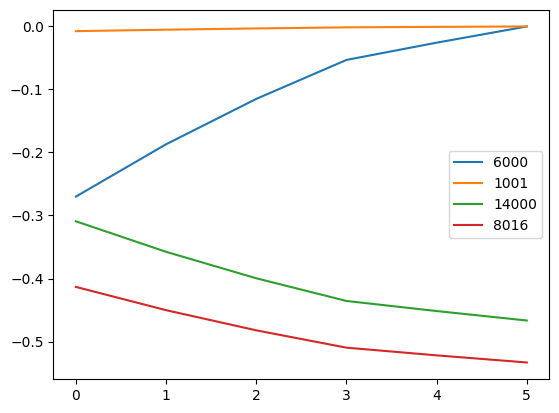

In [14]:
pd.DataFrame(compositions).plot()

In [15]:
names = []


surfaces = static_surfaces
cells = cells

for _, composition in enumerate(compositions):

    carbon = composition[6000]
    silicon = composition[14000]

    title = f"concentration_C_{str(-carbon)[2:]}_Si_{str(-silicon)[2:]}"

    filename = input_folder+title+'.inp'
    materials = static_materials.copy()

    Soil_Material = gen.Material("Soil", 1, composition, '.01')
    materials.append(Soil_Material)

    mcnp = gen.sim(
        title, 
        nps=1e7,
        prdmp=[-60, -60, -1],
        source=source,
        tallies=tallies,
        surfaces=surfaces,
        materials=materials,
        cells=cells,
        )
    print(filename)
    with open(filename, 'w') as f:
        f.write(str(mcnp))
        f.close()

    names.append(title)

df = pd.DataFrame(compositions)
df['name'] = names
df.to_csv('filenames.csv', index=False)  
df    

../../compute/input/concentration_C_27_Si_3092.inp
../../compute/input/concentration_C_187_Si_3576.inp
../../compute/input/concentration_C_115_Si_3996.inp
../../compute/input/concentration_C_0532_Si_4356.inp
../../compute/input/concentration_C_0258_Si_4516.inp
../../compute/input/concentration_C_0001_Si_4666.inp


,6000,1001,14000,8016,name
0,-0.2700,-0.0075,-0.3092,-0.4133,concentration_C_27_Si_3092
1,-0.1870,-0.0052,-0.3576,-0.4502,concentration_C_187_Si_3576
2,-0.1150,-0.0032,-0.3996,-0.4822,concentration_C_115_Si_3996
3,-0.0532,-0.0015,-0.4356,-0.5097,concentration_C_0532_Si_4356
4,-0.0258,-0.0007,-0.4516,-0.5219,concentration_C_0258_Si_4516
5,-0.0001,-0.0001,-0.4666,-0.5332,concentration_C_0001_Si_4666
